Word2vec Vektör Görselleştirme

In [1]:
from gensim.models import Word2Vec

In [2]:
model=Word2Vec.load("data/word2vec.model")

In [4]:
words=list(model.wv.index_to_key)
words[0:6]

['dil', 'doğal', 'işle', 've', 'bir', 'yapay']

In [5]:
import pandas as pd

In [6]:
df_name=[]
df_count=[]

for i in words:
    df_name.append(i)
    df_count.append(model.wv.get_vecattr(i,"count"))

df=pd.DataFrame({"name":df_name,"count":df_count})
df.head()

,name,count
0,dil,962
1,doğal,823
2,işle,733
3,ve,920
4,bir,1363


In [7]:
df.sort_values("count",ascending=False).head()

,name,count
4,bir,1363
0,dil,962
3,ve,920
1,doğal,823
2,işle,733


In [8]:
model.wv.most_similar(["doğal"])

[('ve', 0.9995008707046509),
 ('bir', 0.9994445443153381),
 ('dil', 0.9993970394134521),
 ('iç', 0.9993468523025513),
 ('işle', 0.999315619468689),
 ('il', 0.9993102550506592),
 ('dah', 0.9992544651031494),
 ('olarak', 0.9992392063140869),
 ('bu', 0.9991987347602844),
 ('gör', 0.9991941452026367)]

In [9]:
model.wv.most_similar(["dil"])

[('bir', 0.9995577931404114),
 ('ve', 0.9995425939559937),
 ('il', 0.9995051622390747),
 ('bu', 0.9995022416114807),
 ('iç', 0.9994202256202698),
 ('doğal', 0.9993968605995178),
 ('işle', 0.9993647336959839),
 ('konu', 0.999346911907196),
 ('dah', 0.9993117451667786),
 ('türkçe', 0.9992828965187073)]

In [10]:
model.wv.most_similar(["işle"])

[('bir', 0.9996134042739868),
 ('ve', 0.9995716214179993),
 ('iç', 0.9994819164276123),
 ('il', 0.9994094371795654),
 ('dil', 0.999364972114563),
 ('doğal', 0.9993155002593994),
 ('bu', 0.9992972612380981),
 ('zeka', 0.9992361068725586),
 ('konu', 0.9992119669914246),
 ('yapay', 0.9991942048072815)]

In [12]:
model.wv.similarity("doğal","dil")

0.9993969

In [13]:
import numpy as np

In [16]:
arr=np.empty((0,100),dtype='f')
arr

array([], shape=(0, 100), dtype=float32)

In [17]:
word="işle"

word_labels=[word]
word_labels

['işle']

In [18]:
close_words=model.wv.most_similar([word])
close_words

[('bir', 0.9996134042739868),
 ('ve', 0.9995716214179993),
 ('iç', 0.9994819164276123),
 ('il', 0.9994094371795654),
 ('dil', 0.999364972114563),
 ('doğal', 0.9993155002593994),
 ('bu', 0.9992972612380981),
 ('zeka', 0.9992361068725586),
 ('konu', 0.9992119669914246),
 ('yapay', 0.9991942048072815)]

In [19]:
arr = np.append(arr,np.array([model.wv.get_vector(word)]),axis=0)
arr

array([[-0.25805447,  0.36148778,  0.06782102,  0.07210049,  0.19086525,
        -0.50224024,  0.32087496,  0.7593277 , -0.21113504, -0.19609474,
        -0.03233823, -0.6454656 , -0.12065838,  0.22876903,  0.15046714,
        -0.33601096,  0.2286829 , -0.26799008, -0.17993133, -0.86532   ,
         0.25114945,  0.01652182,  0.24389963,  0.01148038, -0.01885052,
         0.16023721, -0.1073486 , -0.25863868, -0.31827787, -0.04192993,
         0.43000266, -0.11491098,  0.11566369, -0.49865067, -0.27878314,
         0.44009638,  0.03302092, -0.08063421, -0.1807711 , -0.4551962 ,
        -0.10088526, -0.25295207, -0.11130605,  0.10259303,  0.39733046,
        -0.11659054, -0.2862887 , -0.05172446,  0.11027513,  0.16785464,
         0.2588949 , -0.31111002, -0.20338908, -0.14550231, -0.20547841,
         0.02435999,  0.360616  , -0.04862658, -0.33540693, -0.02133025,
        -0.01199207,  0.15387239,  0.14439014, -0.00211713, -0.45105565,
         0.25889647,  0.05804768,  0.3594542 , -0.4

In [21]:
for word_score in close_words:
    wrd_vector=model.wv.get_vector(word_score[0])
    word_labels.append(word_score[0])
    arr=np.append(arr,np.array([wrd_vector]),axis=0)

In [22]:
len(arr)

11

In [35]:
#2 boyuta indirmek için

from sklearn.manifold import TSNE

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\seyda\miniconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [38]:
tsne = TSNE(n_components=2, random_state=42, perplexity=10)   #şaşkınlık değerini ayarlamak için
np.printoptions(suppress=True)
Y = tsne.fit_transform(arr)

In [39]:
Y

array([[ 14.378099 ,  54.633945 ],
       [ 31.33849  , -42.535812 ],
       [-47.823578 , -33.0786   ],
       [ -8.331695 , -19.082258 ],
       [ -8.722288 , -60.964207 ],
       [ 52.71694  ,  33.96201  ],
       [-32.83307  ,  53.786625 ],
       [ 64.047325 , -12.645211 ],
       [-51.200916 ,  10.492307 ],
       [ -9.655045 ,  19.704723 ],
       [ 25.060396 ,   2.5900102]], dtype=float32)

In [42]:
x_cords=Y[:,0]
x_cords

array([ 54.633945 , -42.535812 , -33.0786   , -19.082258 , -60.964207 ,
        33.96201  ,  53.786625 , -12.645211 ,  10.492307 ,  19.704723 ,
         2.5900102], dtype=float32)

In [43]:
y_cords=Y[:,1]
y_cords

array([ 54.633945 , -42.535812 , -33.0786   , -19.082258 , -60.964207 ,
        33.96201  ,  53.786625 , -12.645211 ,  10.492307 ,  19.704723 ,
         2.5900102], dtype=float32)

In [44]:
word_labels

['işle',
 'bir',
 've',
 'iç',
 'il',
 'dil',
 'doğal',
 'bu',
 'zeka',
 'konu',
 'yapay']

In [46]:
!pip install plotly

In [47]:
import plotly.express as px

In [50]:
fig=px.scatter(x=x_cords.tolist(),y=y_cords.tolist(),text=word_labels,size_max=100)
fig.update_layout(height=800, title_text="Word2Vec Most Similarity")
fig.show()

In [53]:
!pip install wordcloud

     ------------------------------------ 152.1/152.1 kB 824.7 kB/s eta 0:00:00


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [55]:
len(words)

10722

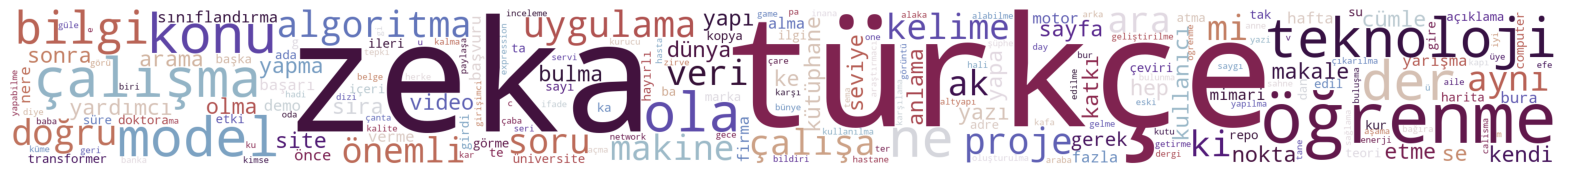

In [57]:
sentence=[]

for i in words:
    sentence.append(i)

text=" ".join(map(str,sentence))

wordcloud = WordCloud(width=3000,height=300,max_font_size=300,background_color="white",colormap="twilight_shifted").generate(text)


plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation=None)
plt.axis("off")
plt.show()